<a href="https://colab.research.google.com/github/talgalper/Honours-2021/blob/main/plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

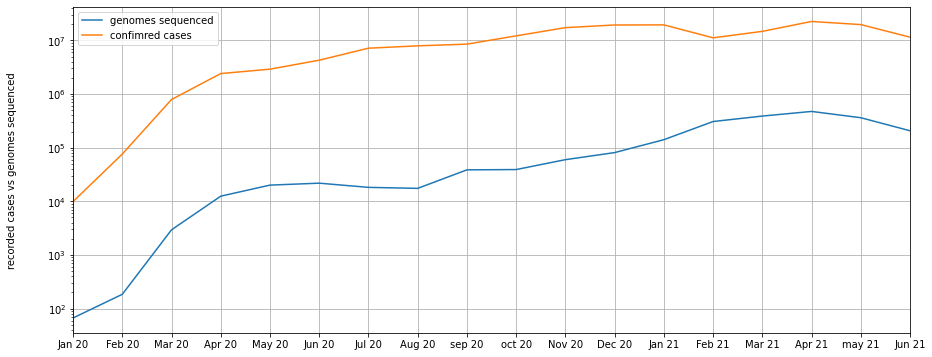

In [ ]:
# sequence submissions
x1 = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
y1 = np.array([67,185,2944,12482,20058,21797,18215,17443,38602,39107,59771,80987,140851,307232,388230,473636,361614,206664,])

# confirmed cases
x2 = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
y2 = np.array([9896,76087,790499,2405681,2906074,4269652,7146907,7904244,8504365,12129873,17268936,19348070,19446155,11152296,14719299,22503021,19676316,11470758])

x_axis_labels = ['Jan 20','Feb 20','Mar 20','Apr 20','May 20','Jun 20','Jul 20','Aug 20','sep 20','oct 20','Nov 20','Dec 20','Jan 21','Feb 21','Mar 21','Apr 21','may 21','Jun 21']

#set figure size
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)

#plot parameters
plt.xticks(x1, x_axis_labels)
plt.plot(x1, y1, label='genomes sequenced')
plt.plot(x2, y2, label='confimred cases')

plt.yscale('log')
plt.legend()
plt.xlim([0,17])
plt.grid()
plt.ylabel('recorded cases vs genomes sequenced',labelpad=30)

plt.savefig('recorded cases vs genomes sequenced')
plt.show()
